<a href="https://colab.research.google.com/github/ajou20658/2023S-Ajou-ML/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2

이번 과제에서는 대출의 승인 여부(Status)를 예측하는 데이터셋을 사용합니다.
<br>
HW1에서 제공한 데이터셋과는 다른 데이터셋입니다. bb에 업로드된 train.csv를 사용하여 과제를 진행해주세요.

[원본 데이터셋 링크](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?select=loan_train.csv)

## 주의
✋ 작성한 모든 코드에 주석을 작성할 것
<br>
✋ 이번 과제에서는 보고서 제출 X, 다만 문제 풀이 파일을 제출해야 함!

## 코랩 연결 및 라이브러리 불러오기

In [201]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [204]:
df = pd.read_csv('./train.csv') # 제공된 train.csv 사용 # 환경에 맞게 path 조절 가능

In [205]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [206]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


In [207]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


## 간단한 EDA

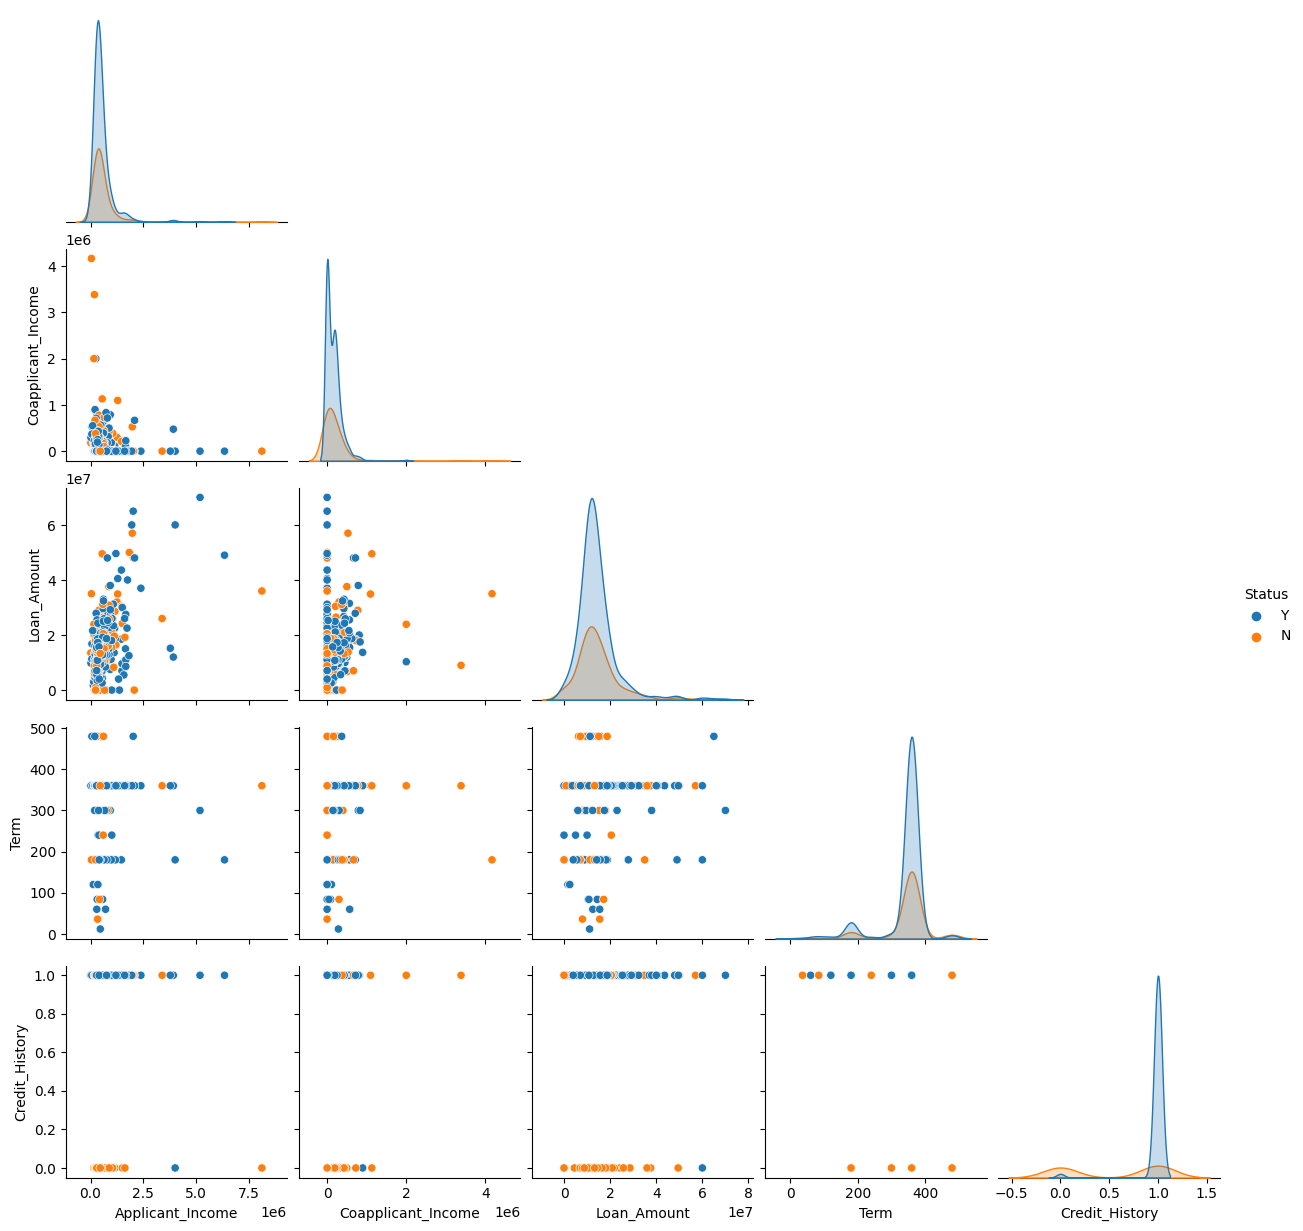

In [209]:
sns.pairplot(df,corner=True,hue='Status') # 이 데이터의 타겟 변수(예측하고자 하는 변수)는 'Status'입니다

<Axes: >

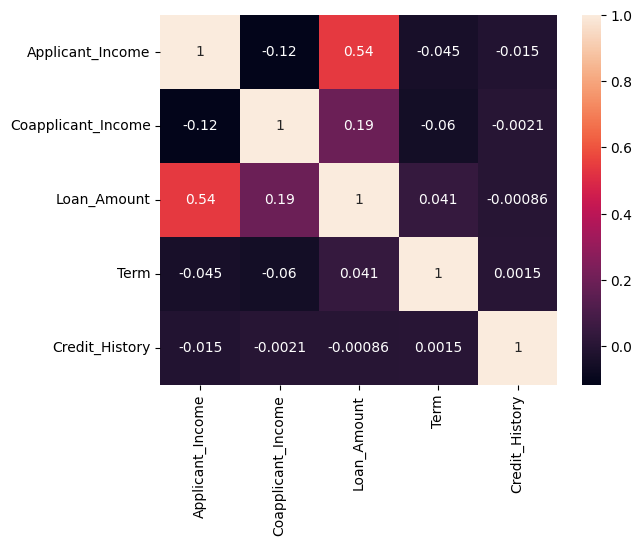

In [210]:
sns.heatmap(df.corr(),annot=True) # numerical feature들끼리의 correlation

## 결측치 확인

In [211]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

## 문제1: Categorical feature missing value drop
categorical feature에서 결측값이 있는 row를 삭제하세요.  
참고) sklearn 패키지에서 제공하는 imputer를 사용하면 최빈값으로 categorical feature의 결측 값도 채울 수 있으나, 편의 상 결측값이 있는 행을 삭제하겠습니다.

In [212]:
## 문제 1 ##
# 코드 작성
categorical = list(df.select_dtypes(include='object').columns) # categorical features들의 column name 모음
df = df.dropna(subset=categorical)
df=df.drop('Credit_History',axis=1)
df
##########

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Area,Status
0,Male,No,0,Graduate,No,584900,0.000000e+00,15000000,360.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,1.508000e+05,12800000,360.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.000000e+00,6600000,360.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,2.358000e+05,12000000,360.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.000000e+00,14100000,360.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,541700,4.196000e+05,26700000,360.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,233300,1.516000e+05,9500000,360.0,Urban,Y
7,Male,Yes,3+,Graduate,No,303600,2.504000e+05,15800000,360.0,Semiurban,N
8,Male,Yes,2,Graduate,No,400600,1.526000e+05,16800000,360.0,Urban,Y
9,Male,Yes,1,Graduate,No,1284100,1.096800e+06,34900000,360.0,Semiurban,N


## 문제2: Label Encoding
모든 categorical feature들을 Label Encoding하여 numerical feature로 바꾸세요.
* LabelEncoder()를 사용하세요

In [213]:
from sklearn.preprocessing import LabelEncoder

In [214]:
categorical = list(df.select_dtypes(include='object').columns) # categorical features들의 column name 모음

In [215]:
## 문제 2 ##
# 코드 작성
numerical = list(df.select_dtypes(include='int64').columns)
numerical += list(df.select_dtypes(include='float64').columns)
numerical.remove('Term')
encoder = LabelEncoder()
for i in categorical:
  result = encoder.fit_transform(df[i])
  df[i]=result
df.dtypes
##########

Gender                  int64
Married                 int64
Dependents              int64
Education               int64
Self_Employed           int64
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                  float64
Area                    int64
Status                  int64
dtype: object

In [216]:
df # categorical -> numerical 로 바뀌었는지 확인

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Area,Status
0,1,0,0,0,0,584900,0.000000e+00,15000000,360.0,2,1
1,1,1,1,0,0,458300,1.508000e+05,12800000,360.0,0,0
2,1,1,0,0,1,300000,0.000000e+00,6600000,360.0,2,1
3,1,1,0,1,0,258300,2.358000e+05,12000000,360.0,2,1
4,1,0,0,0,0,600000,0.000000e+00,14100000,360.0,2,1
5,1,1,2,0,1,541700,4.196000e+05,26700000,360.0,2,1
6,1,1,0,1,0,233300,1.516000e+05,9500000,360.0,2,1
7,1,1,3,0,0,303600,2.504000e+05,15800000,360.0,1,0
8,1,1,2,0,0,400600,1.526000e+05,16800000,360.0,2,1
9,1,1,1,0,0,1284100,1.096800e+06,34900000,360.0,1,0


## 문제 3: KNN imputer
위에서 이 데이터셋의 numberical feature에도 결측치가 있음을 확인했습니다.   
categorical feature에서는 결측치가 있는 행을 drop하였지만 numerical feature 중 결측치가 있는 'Term', 'Credit_History'열에 대해서 KNN imputer를 사용하여 결측치를 채워봅시다.

### 문제 3-1
주어진 코드틀에 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 코드를 작성하세요.  
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

### 문제 3-2
주어진 코드틀에서 k개의 값을 보고 평균을 내어 결측값을 결정하는 코드를 작성하세요.
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [217]:
import tqdm

In [218]:
#pd.set_option('display.max_row', 554) #디버깅용 출력제한 해제
df['Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
5      360.0
6      360.0
7      360.0
8      360.0
9      360.0
10     360.0
12     360.0
13     360.0
14     120.0
15     360.0
16     240.0
17     360.0
18     360.0
20     360.0
21     360.0
22     360.0
25     360.0
26     360.0
27     360.0
28     360.0
31     360.0
32     360.0
33     360.0
34     360.0
35     360.0
36       NaN
37     360.0
38     360.0
39     360.0
40     360.0
41     360.0
42     360.0
43     360.0
44       NaN
45       NaN
46     360.0
47     360.0
48     360.0
49     360.0
50     360.0
51     360.0
52     360.0
53     360.0
54     360.0
55     360.0
56     360.0
57     360.0
58     360.0
59     360.0
60     360.0
61     360.0
62     180.0
63     360.0
64     360.0
65     360.0
66     180.0
67     360.0
68      60.0
69     360.0
70     360.0
71     360.0
72     300.0
73       NaN
74     360.0
75     480.0
76     360.0
77     360.0
78     300.0
79     360.0
80     360.0
81     360.0
82     360.0

In [219]:
class Knn_imputer():
  def __init__(self, n_neighbors): 
        
    ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
    self.k = n_neighbors    
  
  ## knn 은 lazy learning 입니다.
  def fit(self,X):
      self.X = X

  def predict(self, X, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명

    for i in tqdm.tqdm(range(len(X))):
     if pd.isnull(X[feat_name].iloc[i]): # feat_name 열에 있는 결측값 확인
        
        distance = self.dist(X, X.iloc[i], feat_name) # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 함수
        
        sorted_dist = sorted(distance.items(), key=lambda x: x[1]) # distance 를 sorting 하기
        
         ################  문제 3-2  ####################
         # k개의 "feat_name" 값을 보고 평균 내어 값을 결정하기
         # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
         # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################
        add=0
        for k in range(1,self.k+1):
          add+=X[feat_name].iloc[sorted_dist[k][0]]
        df[feat_name].iloc[i]=add/self.k




        

        ################ 코드 끝  ######################
        ##############################################
        
  
  def dist(self, X, y, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명
    num_train = X.shape[0]
    X = X.drop(feat_name, axis=1)
    #axis=1 -> column에 해당됨.
    #X에는 feat_name이 제외된 csv가 할당됨
    y = y.drop(feat_name)

    #y에는 feat_name이 제외된 행(샘플 1개)가 반환됨

    dist_dict = {} ## {index : distance} 형태

    for i in range(num_train):
    
    ################  문제 3-1  ####################
    # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하기
    # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
    # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
    ################ 코드 시작  #####################
      #결측값있는 행만 들어옴
      diff=np.array(X.iloc[i])-np.array(y)
      squared_diff=np.square(diff)
      summed_diff=np.sum(squared_diff, axis=0)
      dist_dict[i]=summed_diff
      
     
    ################ 코드 끝  ######################
    ##############################################
    return dist_dict


In [220]:
# 아래 숫자는 변경하셔도 상관 없습니다.
imputer = Knn_imputer(3)
categorical.append('Term')
normalized_df=df
normalized_df[numerical]=(df[numerical]-df[numerical].mean())/df[numerical].std()

imputer.fit(normalized_df)
# test set에 대해 predict를 진행합니다.
imputer.predict(normalized_df, 'Term')

  0%|          | 0/554 [00:00<?, ?it/s]<ipython-input-219-ffe423d10e12>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i]=add/self.k
  6%|▌         | 31/554 [00:00<00:02, 226.30it/s]<ipython-input-219-ffe423d10e12>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i]=add/self.k
<ipython-input-219-ffe423d10e12>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feat_name].iloc[i]=add/self.k
 10

In [221]:
df.isnull().sum() # 결측치가 채워졌는지 확인

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Area                  0
Status                0
dtype: int64

In [222]:
df['Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
5      360.0
6      360.0
7      360.0
8      360.0
9      360.0
10     360.0
12     360.0
13     360.0
14     120.0
15     360.0
16     240.0
17     360.0
18     360.0
20     360.0
21     360.0
22     360.0
25     360.0
26     360.0
27     360.0
28     360.0
31     360.0
32     360.0
33     360.0
34     360.0
35     360.0
36     360.0
37     360.0
38     360.0
39     360.0
40     360.0
41     360.0
42     360.0
43     360.0
44     300.0
45     360.0
46     360.0
47     360.0
48     360.0
49     360.0
50     360.0
51     360.0
52     360.0
53     360.0
54     360.0
55     360.0
56     360.0
57     360.0
58     360.0
59     360.0
60     360.0
61     360.0
62     180.0
63     360.0
64     360.0
65     360.0
66     180.0
67     360.0
68      60.0
69     360.0
70     360.0
71     360.0
72     300.0
73     300.0
74     360.0
75     480.0
76     360.0
77     360.0
78     300.0
79     360.0
80     360.0
81     360.0
82     360.0

## 문제 4: correlation
DataFrame df에 대해서 correlation heatmap을 그린 후, Status에 가장 영향을 주는 feature는 무엇인지 서술하세요

* Status에 가장 영향을 주는 feature에 대한 서술
:

<Axes: >

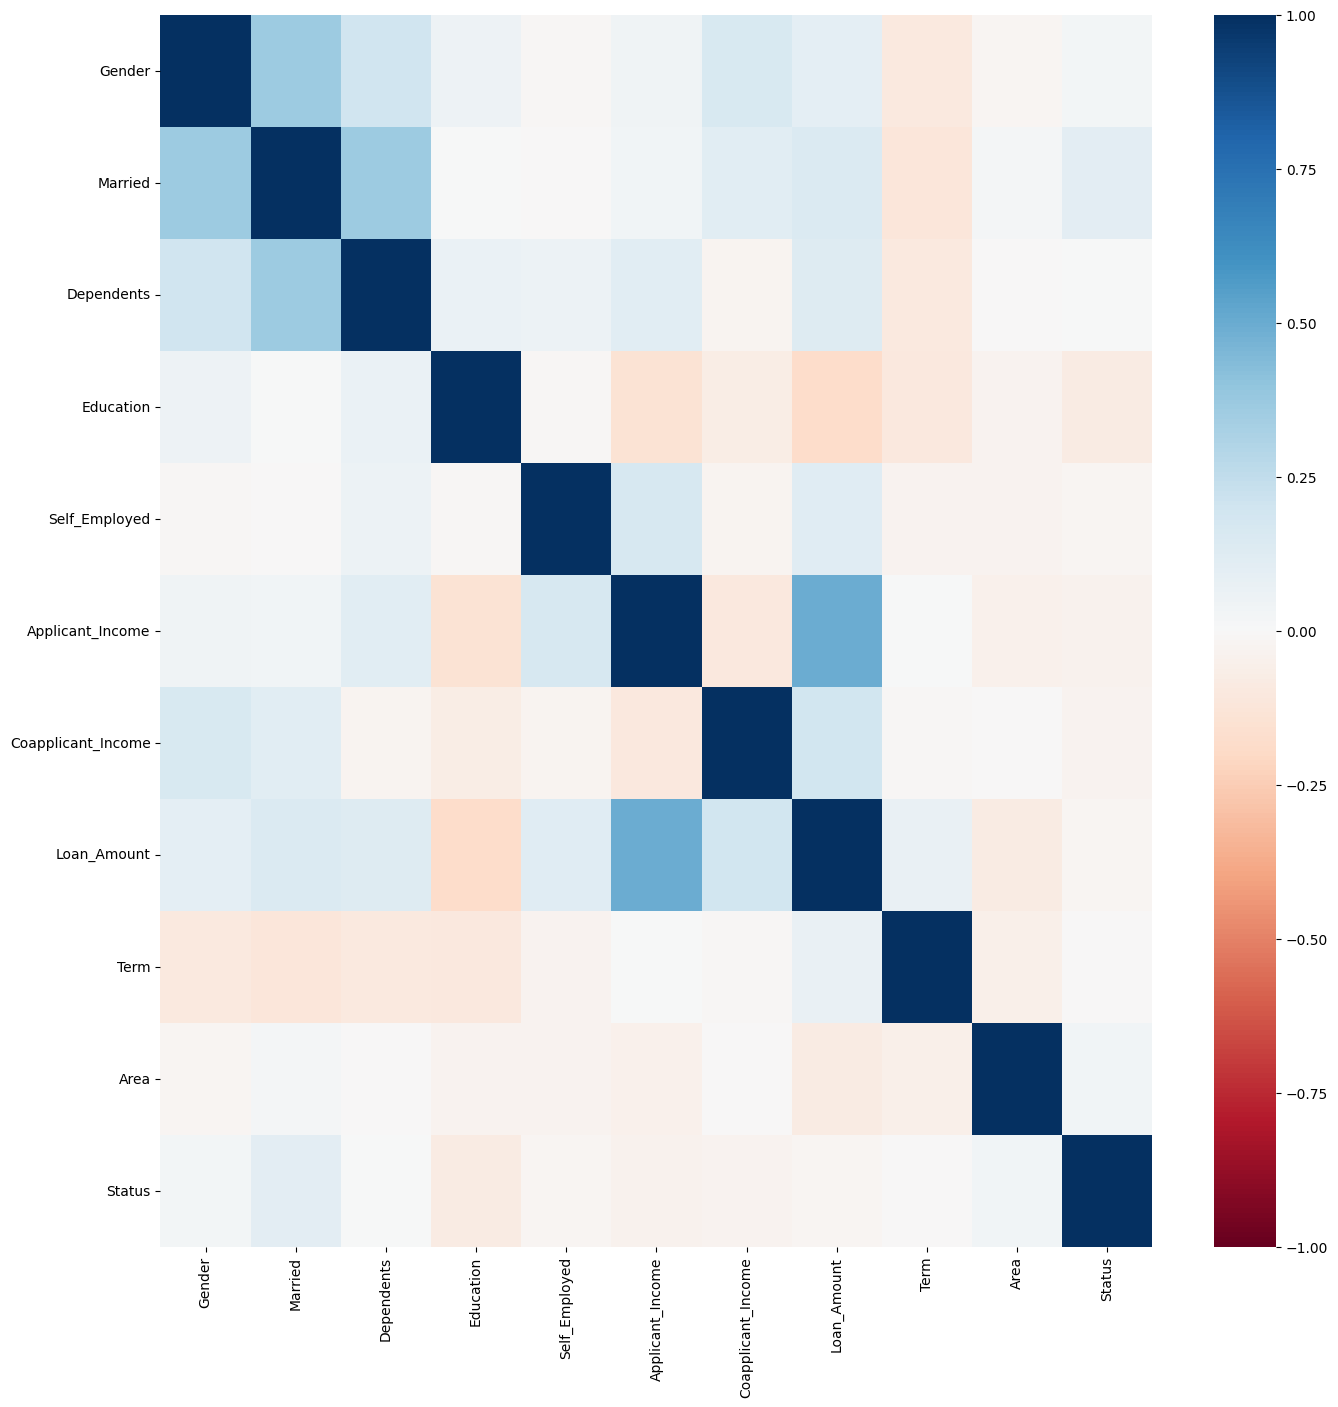

In [247]:
plt.figure(figsize = (16,16)) # figure 사이즈 조절

## 문제 4 ##
# 코드 작성
corr=df.corr()
sns.heatmap(corr,cmap='RdBu',vmin=-1,vmax=1)
############

## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.

In [248]:
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis=1) # target feature가 Status(대출의 승인 여부)
y = df['Status']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (442, 10)
y_train's shape :  (442,)

X_val's shape :  (56, 10)
y_val's shape :  (56,)

X_test's shape :  (56, 10)
y_test's shape :  (56,)


## 문제5: KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [265]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

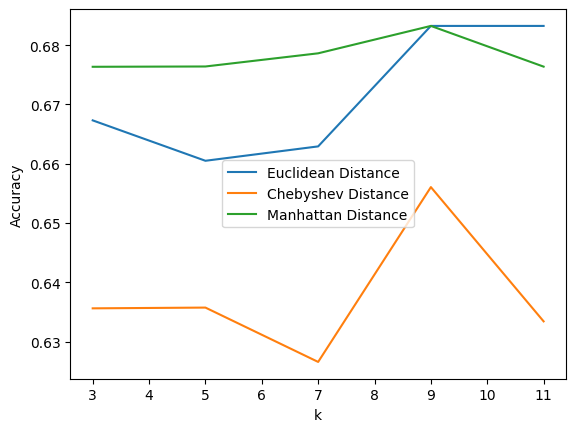

In [267]:
### 문제 1 ###
### 코드 작성 ###
knn=KNeighborsClassifier()
distance_metrics=['euclidean','manhattan','chebyshev']
k_values=[3,5,7,9,11]
param_grid={'n_neighbors':k_values,'metric':distance_metrics}
grid_search = GridSearchCV(knn,param_grid,scoring='accuracy')
grid_search.fit(X_train,y_train)
# print(grid_search.cv_results_)
euclidean_scores=[]
manhattan_scores=[]
chebyshev_scores=[]
# GridSearchCV() 함수의 결과를 바탕으로 정확도 저장
for i in range(len(distance_metrics)):
    for j in range(len(k_values)):
        accuracy = grid_search.cv_results_['mean_test_score'][j + i*len(k_values)]
        if distance_metrics[i] == 'euclidean':
            euclidean_scores.append(accuracy)
        elif distance_metrics[i]=='manhattan':
            manhattan_scores.append(accuracy)
        else:
            chebyshev_scores.append(accuracy)


plt.plot(k_values,euclidean_scores,label='Euclidean Distance')
plt.plot(k_values,chebyshev_scores,label='Chebyshev Distance')
plt.plot(k_values,manhattan_scores,label='Manhattan Distance')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
################

**설명 작성**  
- 최적의 파라미터:
- 설명:

## 문제6 Cross validation with Linear SVM
### 6-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - C 이외의 하이퍼파라미터는 임의로 설정 가능
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 6-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - C 이외의 하이퍼파라미터는 임의로 설정 가능
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [227]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [228]:
## 문제 6-1 ##
# 코드 작성


############

**설명 작성**  
- 최적의 파라미터:
- 설명:

In [229]:
## 문제 6-2 ##
# 코드 작성

############

**설명 작성**  
- 최적의 파라미터:
- 설명:

## 문제7 Cross validation with SVM
### 7-1: k-fold
- 문제6-1 코드에서 kernel을 바꾸어 k-fold를 진행하세요
- C는 2로 설정하고 k=5로 설정합니다.

### 7-2: Leave One Out
- 문제6-2 코드에서 kernel을 바꾸어 Leave one out를 진행하세요
- C는 2로 설정합니다.

### 7-3: 데이터의 특성
문제 6의 결과와 7-1, 7-2의 결과를 비교하여 보았을 때 주어진 데이터는 어떤 관계인지 (선형, 비선형)인지 적고, 왜 그런지 그 이유를 서술하세요


In [230]:
## 문제 7-1 ##
# 코드 작성

############

In [231]:
## 문제 7-2 ##
# 코드 작성

############

**7-3 설명 작성**  
- 설명:

## 문제 8: Grid search
### 문제 8-1
주어진 param_grid에 대해서 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고 best hyperparameter를 출력하세요.  
* 아래의 주어진 패키지를 사용합니다.



In [232]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [233]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [234]:
## 문제 8-1 ##
## 코드 작성 ##

############

### 문제 8-2
8-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 후 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.

In [235]:
from sklearn.metrics import accuracy_score

In [236]:
## 문제 8-2 ##
## 코드 작성 ##

############